In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = "../midsave/consolidated_reforestation_projects.parquet"


merged_df= gpd.read_parquet(file_path)


In [5]:
merged_df =merged_df.rename(columns={
    "NDVI_Polygon_atplanting": "NDVI_Polygon_At_Planting",
    "NDVI_Polygon_1yr_before": "NDVI_Polygon_1YearBefore",
    "NDVI_Polygon_1yr_after": "NDVI_Polygon_1YearAfter",
    "NDVI_Polygon_2yr_after": "NDVI_Polygon_2YearsAfter",
    "NDVI_Polygon_5yr_after": "NDVI_Polygon_5YearsAfter",
    "NDVI_Buffer_atplanting": "NDVI_Buffer_At_Planting",
    "NDVI_Buffer_1yr_before": "NDVI_Buffer_1YearBefore",
    "NDVI_Buffer_1yr_after": "NDVI_Buffer_1YearAfter",
    "NDVI_Buffer_2yr_after": "NDVI_Buffer_2YearsAfter",
    "NDVI_Buffer_5yr_after": "NDVI_Buffer_5YearsAfter",
      "NDRE_Polygon_atplanting": "NDRE_Polygon_At_Planting",
    "NDRE_Polygon_1yr_before": "NDRE_Polygon_1YearBefore",
    "NDRE_Polygon_1yr_after": "NDRE_Polygon_1YearAfter",
    "NDRE_Polygon_2yr_after": "NDRE_Polygon_2YearsAfter",
    "NDRE_Polygon_5yr_after": "NDRE_Polygon_5YearsAfter",
    "NDRE_Buffer_atplanting": "NDRE_Buffer_At_Planting",
    "NDRE_Buffer_1yr_before": "NDRE_Buffer_1YearBefore",
    "NDRE_Buffer_1yr_after": "NDRE_Buffer_1YearAfter",
    "NDRE_Buffer_2yr_after": "NDRE_Buffer_2YearsAfter",
    "NDRE_Buffer_5yr_after": "NDRE_Buffer_5YearsAfter",
        "SAVI_Polygon_atplanting": "SAVI_Polygon_At_Planting",
    "SAVI_Polygon_1yr_before": "SAVI_Polygon_1YearBefore",
    "SAVI_Polygon_1yr_after": "SAVI_Polygon_1YearAfter",
    "SAVI_Polygon_2yr_after": "SAVI_Polygon_2YearsAfter",
    "SAVI_Polygon_5yr_after": "SAVI_Polygon_5YearsAfter",
    "SAVI_Buffer_atplanting": "SAVI_Buffer_At_Planting",
    "SAVI_Buffer_1yr_before": "SAVI_Buffer_1YearBefore",
    "SAVI_Buffer_1yr_after": "SAVI_Buffer_1YearAfter",
    "SAVI_Buffer_2yr_after": "SAVI_Buffer_2YearsAfter",
    "SAVI_Buffer_5yr_after": "SAVI_Buffer_5YearsAfter"
})

In [6]:
columns_to_check = [
    "NDVI_Polygon_At_Planting",
    "NDVI_Polygon_1YearAfter",
    "NDVI_Polygon_2YearsAfter",
    "NDVI_Polygon_5YearsAfter"
]

filtered_data = merged_df.dropna(subset=columns_to_check)
filtered_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 246132 entries, 3124 to 1229044
Data columns (total 96 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   site_id_created               246132 non-null  int64   
 1   project_id_reported           246132 non-null  object  
 2   site_description_reported     0 non-null       object  
 3   site_sqkm                     246132 non-null  float64 
 4   trees_planted_reported        80 non-null      float64 
 5   country                       3 non-null       object  
 6   project_description_reported  246132 non-null  object  
 7   planting_date_reported        246132 non-null  object  
 8   survival_rate_reported        3 non-null       float64 
 9   host_name                     246132 non-null  object  
 10  url                           246132 non-null  object  
 11  species_count_reported        0 non-null       float64 
 12  species_planted_reporte

### The  columns to consider in the Data quality Framework


1. Site_sqkm
2. Road presence
3. Nested_in
4. Intersecting_with
5. Built area presence
6. Forest at planting
7. Presence of other land cover classes
8. Administrative area overlap
9. Circular shape indicator
10. Invalid geometries indicator
11. Buffer change and polygon area change difference




In [7]:
from datetime import datetime
merged_data=merged_df.copy()

def extract_planting_date(date_str):
    if pd.isna(date_str) or date_str in ['{}', '']:
        return pd.NaT  # Returning NaT for missing values

    date_str = str(date_str).strip()

    if date_str.replace('.', '', 1).isdigit():
        return datetime(int(float(date_str)), 1, 1)

    date_str = date_str.replace('/', '-')  # Normalizing date formats (e.g., 2015/06/30 → 2015-06-30)

    try:
        return pd.to_datetime(date_str, errors='coerce', utc=True)
    except:
        return pd.NaT


merged_data['planting_date_reported'] = merged_data['planting_date_reported'].apply(extract_planting_date)


merged_data['planting_date_reported'] = pd.to_datetime(merged_data['planting_date_reported'], errors='coerce', utc=True)


merged_data['PlantingYear'] = merged_data['planting_date_reported'].dt.year

merged_data.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1288033 entries, 0 to 1288032
Data columns (total 97 columns):
 #   Column                        Non-Null Count    Dtype              
---  ------                        --------------    -----              
 0   site_id_created               1288033 non-null  int64              
 1   project_id_reported           1288033 non-null  object             
 2   site_description_reported     3699 non-null     object             
 3   site_sqkm                     1283663 non-null  float64            
 4   trees_planted_reported        4644 non-null     float64            
 5   country                       56611 non-null    object             
 6   project_description_reported  1267813 non-null  object             
 7   planting_date_reported        1275381 non-null  datetime64[ns, UTC]
 8   survival_rate_reported        2575 non-null     float64            
 9   host_name                     1288033 non-null  object             
 10

In [8]:
merged_data['planting_date_reported']

,planting_date_reported
0,NaT
1,2012-01-01 00:00:00+00:00
2,2012-01-01 00:00:00+00:00
3,2012-01-01 00:00:00+00:00
4,2021-01-01 00:00:00+00:00
...,...
1288028,1970-01-01 00:00:00.000002023+00:00
1288029,1970-01-01 00:00:00.000002023+00:00
1288030,1970-01-01 00:00:00.000002023+00:00
1288031,1970-01-01 00:00:00.000002023+00:00


In [9]:
years = [2000, 2005, 2010, 2015, 2020]


def get_nearest_tree_cover(row):
    if pd.isna(row['PlantingYear']):
        return np.nan
    planting_year = int(row['PlantingYear'])
    nearest_year = min(years, key=lambda x: abs(x - planting_year))
    return row[f'tree_cover_area_{nearest_year}']


merged_data['treecover_atplanting'] = merged_data.apply(get_nearest_tree_cover, axis=1)

merged_data.head()


,site_id_created,project_id_reported,site_description_reported,site_sqkm,trees_planted_reported,country,project_description_reported,planting_date_reported,survival_rate_reported,host_name,...,circularity_90,Polygon_acircle_oval_90,circularity_85,Polygon_acircle_oval_85,circularity_80,Polygon_acircle_oval_80,site_sqkm_reported,project_pdf_available,PlantingYear,treecover_atplanting
0,0,proj_ezpAp1POh20dBnYpx0BjhU35,Farm for the Future demonstration plot,0.013591,313.0,br,This project will be implemented at Farm of th...,NaT,80.0,Planet for the Planet,...,0.771267,No,0.771267,No,0.771267,No,NaN,NaN,NaN,NaN
1,1,proj_ZCspL8JYmUu0OXcx6O73I1j0,The area to be reforested is around the Tinguá...,0.631388,3418.0,br,"ITPA was born in 1998, from the initiative of ...",2012-01-01 00:00:00+00:00,90.0,Planet for the Planet,...,0.395237,No,0.395237,No,0.395237,No,NaN,NaN,2012.0,NaN
2,2,proj_ZCspL8JYmUu0OXcx6O73I1j0,The area to be reforested is around the Tinguá...,3.076566,3418.0,br,"ITPA was born in 1998, from the initiative of ...",2012-01-01 00:00:00+00:00,90.0,Planet for the Planet,...,0.345105,No,0.345105,No,0.345105,No,NaN,NaN,2012.0,NaN
3,3,proj_ZCspL8JYmUu0OXcx6O73I1j0,The area to be reforested is around the Tinguá...,0.304860,3418.0,br,"ITPA was born in 1998, from the initiative of ...",2012-01-01 00:00:00+00:00,90.0,Planet for the Planet,...,0.401957,No,0.401957,No,0.401957,No,NaN,NaN,2012.0,NaN
4,4,proj_nXBzA2sbX2tm1D75p7bfJ81Z,Plant-for-Ghana is a pioneer reforestation pro...,10.375493,43814.0,gh,Plant-for-Ghana is a hybrid restoration agrofo...,2021-01-01 00:00:00+00:00,93.0,Planet for the Planet,...,0.783603,No,0.783603,No,0.783603,No,NaN,NaN,2021.0,NaN


In [10]:
for period in [ "1YearAfter", "2YearsAfter", "5YearsAfter"]:
    # Calculating changes for Polygon data
    merged_data[f"NDVI_Polygon_Change_{period}"] = (
        merged_data[f"NDVI_Polygon_{period}"] - merged_data["NDVI_Polygon_At_Planting"]
    )

    # Calculating changes for Buffer data
    merged_data[f"NDVI_Buffer_Change_{period}"] = (
        merged_data[f"NDVI_Buffer_{period}"] - merged_data["NDVI_Buffer_At_Planting"]
    )


In [11]:
# Selecting the  specific quality assessment columns
columns_of_interest = ['site_id_created','site_id_reported','project_id_reported','site_sqkm','trees_planted_reported','Intersecting_with','Nested_in','built_area_2018','total_road_length_km',"loss_post_3",
                       "loss_post_5","loss_pre_5","planting_date_reported","other_land_cover_area_2020",
                       'treecover_atplanting',
                       "geometry","NDVI_Polygon_At_Planting","NDVI_Polygon_Change_1YearAfter", "NDVI_Buffer_Change_1YearAfter",
                        "NDVI_Polygon_Change_2YearsAfter", "NDVI_Buffer_Change_2YearsAfter",
                        "NDVI_Polygon_Change_5YearsAfter", "NDVI_Buffer_Change_5YearsAfter","Polygon_acircle_oval_95","exact-admin_area"

                       ]
filtered_df = merged_data[columns_of_interest]
filtered_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1288033 entries, 0 to 1288032
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype              
---  ------                           --------------    -----              
 0   site_id_created                  1288033 non-null  int64              
 1   site_id_reported                 1288033 non-null  object             
 2   project_id_reported              1288033 non-null  object             
 3   site_sqkm                        1283663 non-null  float64            
 4   trees_planted_reported           4644 non-null     float64            
 5   Intersecting_with                1229172 non-null  object             
 6   Nested_in                        420272 non-null   object             
 7   built_area_2018                  1062500 non-null  float64            
 8   total_road_length_km             1046600 non-null  float64            
 9   loss_post_3                      72634



# Intersecting and nested polygons to identify quality,completeness of the  Data

In [12]:
# Extracting nested values and handle conversions safely
nested_values = set()
for val in filtered_df['Nested_in'].dropna():
    nested_values.update(map(str.strip, str(val).split(',')))


converted_nested = set()
for value in nested_values:
    try:

        converted_value = str(int(float(value)))
        converted_nested.add(converted_value)
    except ValueError:

        pass


filtered_df['Contains_small_polygon'] = filtered_df['site_id_created'].astype(str).apply(
    lambda x: 'Yes' if x in converted_nested else 'No'
)

print(filtered_df['Contains_small_polygon'].value_counts())

Contains_small_polygon
No     1183696
Yes     104337
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:


def check_intersection(x):

    if isinstance(x, list):
        return 0 if len(x) > 0 else 1  # : No intersection -> 1, Intersection -> 0
    elif isinstance(x, np.ndarray):
        return 0 if x.size > 0 else 1

    elif isinstance(x, str):
        return 0 if len(x) > 2 else 1

    else:
        return 1

filtered_df['Intersecting Polygon'] = filtered_df['Intersecting_with'].apply(check_intersection)

# Not nesting other polygon allocate 1 else 0
filtered_df['Nesting Polygon'] = np.where(
    filtered_df['Contains_small_polygon'] == 'No',
    1,
    0
)
filtered_df['Intersecting Polygon'].value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
Intersecting Polygon,
1,772641
0,515392



# Presence of Forest at Planting
Presence of vegetation at planting date either missed planting date or missed geometry boundaries

In [14]:
filtered_df["forest_at_planting_glad"] = np.where(
    filtered_df["treecover_atplanting"].isna(),
    np.nan,
    np.where(
        filtered_df["treecover_atplanting"] >= 0.2 * filtered_df["site_sqkm"],
        0,
        1
    )
)
filtered_df["forest_at_planting_glad"].value_counts()


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
forest_at_planting_glad,
1.0,971171
0.0,248291


# Change in Neighborhood

In [15]:


# def check_ndvi_change(row):
#     values = [
#         row["NDVI_Buffer_Change_1YearAfter"],
#         row["NDVI_Buffer_Change_2YearsAfter"],
#         row["NDVI_Buffer_Change_5YearsAfter"]
#     ]


#     valid_values = [x for x in values if not np.isnan(x)]

#     # If all values are NaN, return NaN
#     if not valid_values:
#         return np.nan

#     # If any value > 0.1, return 0, else return 1 "
#     return 0 if any(x > 0.1 for x in valid_values) else 1


# filtered_df["Change_in_buffer_ndvi"] = filtered_df.apply(check_ndvi_change, axis=1)


# filtered_df.head()
def check_ndvi_change_strict(row):
    values = [
        row["NDVI_Buffer_Change_1YearAfter"],
        row["NDVI_Buffer_Change_2YearsAfter"],
        row["NDVI_Buffer_Change_5YearsAfter"]
    ]

    valid_values = [x for x in values if not np.isnan(x)]

    if not valid_values:
        return np.nan


    return 0 if all(x > 0.3 for x in valid_values) else 1

filtered_df["Change_in_buffer_ndvi"] = filtered_df.apply(check_ndvi_change_strict, axis=1)
filtered_df["Change_in_buffer_ndvi"].value_counts()


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
Change_in_buffer_ndvi,
1.0,600006
0.0,4295


# Presence Other Landcover Score

In [16]:

filtered_df['other_landcover_score'] = np.select(
    [
        filtered_df['other_land_cover_area_2020'].isna(),
        filtered_df['site_sqkm'].isna(),
        filtered_df['other_land_cover_area_2020'] >= 0.2 * filtered_df['site_sqkm']  # If it's at least 10% of site_sqkm, return 0
    ],
    [
        np.nan,
        np.nan,
        0
    ],
    default=1  # Else, return 1
)
filtered_df['other_landcover_score'].value_counts()


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
other_landcover_score,
1.0,1097422
0.0,121252


# Infrastructure Presence
Roads and built area

In [17]:
filtered_df["Road_presence"] = filtered_df["total_road_length_km"].apply(
    lambda x: 0 if x > 0 else (1 if x == 0 else np.nan)
)

filtered_df["Road_presence"].value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
Road_presence,
1.0,1036367
0.0,10233


Built Area Presence

In [18]:
filtered_df["Built_area_presence"] = filtered_df["built_area_2018"].apply(
    lambda x: 0 if x > 0 else (1 if x == 0 else np.nan)
)

filtered_df["Built_area_presence"].value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
Built_area_presence,
1.0,937024
0.0,125476


# If Project Geometries Invalid

In [19]:

filtered_df['project_geometries_invalid'] = ~filtered_df.geometry.is_valid


print(filtered_df['project_geometries_invalid'].value_counts())
filtered_df['geometry validity'] = np.where(
    filtered_df['project_geometries_invalid'] == False,
    1,
    0
)
filtered_df['geometry validity'].value_counts()

project_geometries_invalid
False    1288033
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
geometry validity,
1,1288033


## Circularity

In [20]:

filtered_df['perfect_circle_indicator'] = np.where(
    filtered_df['Polygon_acircle_oval_95'] == 'No',
    1,
    0
)
filtered_df['perfect_circle_indicator'].value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
perfect_circle_indicator,
1,1221377
0,66656


# Exact Admin area

In [21]:

filtered_df['admin_area_indicator'] = np.where(
    filtered_df['exact-admin_area'] == 'No',
    1,
    0
)
filtered_df['admin_area_indicator'].value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
admin_area_indicator,
1,1228894
0,59139


In [23]:

score_columns = [
     'forest_at_planting_glad',
    #  'Change_in_buffer_ndvi',
    "other_landcover_score",
                       'Built_area_presence','Road_presence',"geometry validity",'admin_area_indicator','perfect_circle_indicator','Intersecting Polygon','Nesting Polygon'
]



In [43]:
#  Keep only Polygon and MultiPolygon geometries
filtered_df = filtered_df[filtered_df.geometry.apply(lambda geom: geom.geom_type in ["Polygon", "MultiPolygon"])]
geometry_types = filtered_df.geometry.apply(lambda geom: geom.geom_type)
geometry_counts = geometry_types.value_counts()

print(geometry_counts)

geometry
Polygon    1173300
Name: count, dtype: int64


In [44]:



filtered_df['quality_score'] = filtered_df[score_columns].sum(axis=1)
filtered_df['quality_score'] = filtered_df['quality_score'].round(2)
filtered_df.head()


,site_id_created,site_id_reported,project_id_reported,site_sqkm,trees_planted_reported,Intersecting_with,Nested_in,built_area_2018,total_road_length_km,loss_post_3,...,forest_at_planting_glad,Change_in_buffer_ndvi,other_landcover_score,Road_presence,Built_area_presence,project_geometries_invalid,geometry validity,perfect_circle_indicator,admin_area_indicator,quality_score
0,0,site_W97pqKxXURFOA1E,proj_ezpAp1POh20dBnYpx0BjhU35,0.013591,313.0,[983967 0],"0.0, 983967.0",0.000000,0.0,NaN,...,NaN,NaN,1.0,1.0,1.0,False,1,1,1,6.0
1,1,site_NekKEGqkIO4rZ5C,proj_ZCspL8JYmUu0OXcx6O73I1j0,0.631388,3418.0,[ 1 2 2 900848],"1.0, 900848.0",0.000137,0.0,NaN,...,NaN,NaN,1.0,1.0,0.0,False,1,1,1,5.0
2,2,site_Wl3hF91IBkei1Xy,proj_ZCspL8JYmUu0OXcx6O73I1j0,3.076566,3418.0,[ 3 3 2 900848],"2.0, 900848.0",0.003571,0.0,NaN,...,NaN,NaN,1.0,1.0,0.0,False,1,1,1,5.0
3,3,site_qHUXswEmePqou5T,proj_ZCspL8JYmUu0OXcx6O73I1j0,0.304860,3418.0,[ 3 900848],"3.0, 900848.0",0.001965,0.0,NaN,...,NaN,NaN,1.0,1.0,0.0,False,1,1,1,5.0
4,4,site_2ITLGnOa3jbDUFa,proj_nXBzA2sbX2tm1D75p7bfJ81Z,10.375493,43814.0,[4],4.0,0.000354,0.0,NaN,...,NaN,NaN,1.0,1.0,0.0,False,1,1,1,5.0


In [45]:
filtered_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1173300 entries, 0 to 1283662
Data columns (total 38 columns):
 #   Column                           Non-Null Count    Dtype              
---  ------                           --------------    -----              
 0   site_id_created                  1173300 non-null  int64              
 1   site_id_reported                 1173300 non-null  object             
 2   project_id_reported              1173300 non-null  object             
 3   site_sqkm                        1173300 non-null  float64            
 4   trees_planted_reported           4618 non-null     float64            
 5   Intersecting_with                1118809 non-null  object             
 6   Nested_in                        361396 non-null   object             
 7   built_area_2018                  969603 non-null   float64            
 8   total_road_length_km             961911 non-null   float64            
 9   loss_post_3                      721084 non

In [46]:
filtered_large_sites = filtered_df[filtered_df["site_sqkm"] >1000]
filtered_large_sites.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1652 entries, 376 to 1283475
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   site_id_created                  1652 non-null   int64              
 1   site_id_reported                 1652 non-null   object             
 2   project_id_reported              1652 non-null   object             
 3   site_sqkm                        1652 non-null   float64            
 4   trees_planted_reported           57 non-null     float64            
 5   Intersecting_with                1360 non-null   object             
 6   Nested_in                        62 non-null     object             
 7   built_area_2018                  1283 non-null   float64            
 8   total_road_length_km             735 non-null    float64            
 9   loss_post_3                      7 non-null      float64          

In [47]:
print(filtered_df['quality_score'].value_counts())

quality_score
8.0    497037
9.0    306082
7.0    242538
6.0     60054
3.0     54239
5.0     11616
4.0      1403
2.0       331
Name: count, dtype: int64


In [49]:
# (306082+ 497037+242538)/(1173300)

In [50]:
newd = filtered_df[filtered_df['quality_score']==9]
newd=newd.tail(200)


In [51]:
newd.head(10)

,site_id_created,site_id_reported,project_id_reported,site_sqkm,trees_planted_reported,Intersecting_with,Nested_in,built_area_2018,total_road_length_km,loss_post_3,...,forest_at_planting_glad,Change_in_buffer_ndvi,other_landcover_score,Road_presence,Built_area_presence,project_geometries_invalid,geometry validity,perfect_circle_indicator,admin_area_indicator,quality_score
1055210,1055213,129,3339,0.283011,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055211,1055214,130,3339,0.329927,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055212,1055215,131,3339,0.182667,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055213,1055216,132,3339,0.177177,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055214,1055217,133,3339,0.493066,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055215,1055218,134,3339,0.246335,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055216,1055219,135,3339,0.289838,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055217,1055220,136,3339,0.704539,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055220,1055223,139,3339,0.433034,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0
1055228,1055231,147,3339,0.029137,NaN,[],None,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,False,1,1,1,9.0


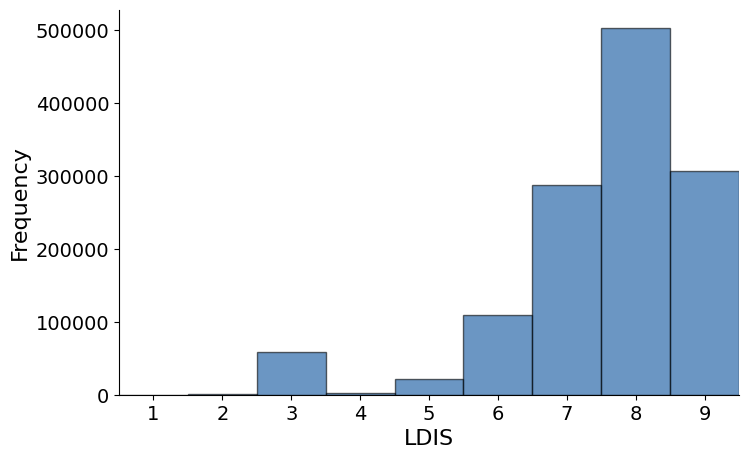

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))


global_min = 1
global_max = 9


bins = np.arange(global_min - 0.5, global_max + 1.5, 1)


plt.hist(filtered_df['quality_score'], bins=bins, color="#08519c", edgecolor='black', alpha=0.6)

# plt.title('Distribution of Quality Scores', fontsize=16)
plt.xlabel('LDIS', fontsize=16)
plt.ylabel('Frequency', fontsize=16)


plt.xlim(global_min - 0.5, global_max + 0.5)
plt.xticks(np.arange(global_min, global_max + 1), fontsize=14)

plt.yticks(fontsize=14)

# plt.grid(axis='y', linestyle='--', alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [ ]:
pip install simplekml

In [42]:
import simplekml
import geopandas as gpd
import os

output_folder = "/content/drive/MyDrive/Colab Notebooks/kml_files_9verfying_withoutbuffer"
os.makedirs(output_folder, exist_ok=True)

for site_name, site_data in newd.groupby("site_id_created"):
    kml = simplekml.Kml()

    for _, row in site_data.iterrows():
        geom = row["geometry"]

        if geom.geom_type == "Polygon":
            pol = kml.newpolygon(
                name=str(site_name),
                outerboundaryis=[(x, y) for x, y in geom.exterior.coords]
            )
            pol.style.polystyle.color = simplekml.Color.changealpha("00", simplekml.Color.white)
            pol.style.linestyle.color = simplekml.Color.blue
            pol.style.linestyle.width = 4  # Adjusting boundary thickness if needed


    kml_file_path = os.path.join(output_folder, f"{site_name}.kml")
    kml.save(kml_file_path)

print(f"KML files saved in '{output_folder}' folder!")

KML files saved in 'kml_files_10_new' folder!
